Initial setup

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk

In [3]:
# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

In [4]:
RC = mk.RecordCollection("tmp/filtered_corpora.txt")

Corpora consists of 15754 Publications


In [7]:
# Checking if expected paper is in corpora
corpora_df.loc[corpora_df['DOI'] == '10.1016/j.jocs.2015.08.008', :]

,AU,DE,DOI,SO,abstract,id,keywords,title,year
13489,"Feinberg, Jonathan|Langtangen, Hans Petter",uncertainty quantification|polynomial chaos ex...,10.1016/j.jocs.2015.08.008,JOURNAL OF COMPUTATIONAL SCIENCE,the paper describes the philosophy design func...,WOS:000367774700005,,Chaospy: An open source tool for designing met...,2015


<hr>

Criteria analysis of filtered corpora: <br>
- Search papers in topic of interest by keyword
- Run criteria search on filtered corpora
- Plot trend in criteria matches

In [22]:
#want to see trend of global SA over years
#also should make a table of papers, see below
criteria = {
    'GSA': set(['global sensitivity analysis', 'GSA', 'global sensitivity'])
}

crit_matches = wosis.keyword_matches_by_criteria(filtered_corpora, criteria, threshold=95.0)

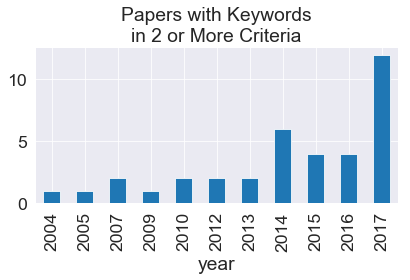

In [23]:
criteria_df = wosis.collate_keyword_criteria_matches(filtered_corpora, crit_matches)
wos_plot.plot_criteria_trend(criteria_df, threshold=1)

In [24]:
criteria_df.count()

abstract              13955
id                    13955
keywords              13955
title                 13955
year                  13955
num_criteria_match    13955
dtype: int64

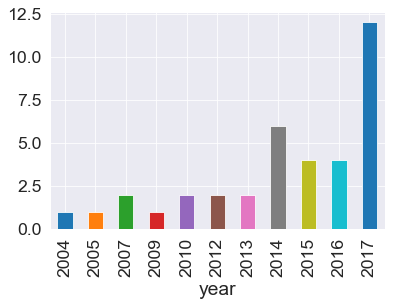

In [25]:
#want to view the papers in the above plot
crit_trend_tmp = criteria_df.loc[criteria_df['num_criteria_match'] > 1, ~criteria_df.columns.isin(hide_columns)]
#criteria_trend.loc[:, criteria_trend.columns.isin(hide_columns)].head(10)


crit_trend_tmp.groupby('year').count()['title'].plot(kind='bar')

In [28]:
gsa_matches = wosis.keyword_matches(filtered_corpora, criteria['GSA'], threshold=95.0)

In [29]:
gsa_collated = gsa_matches.combine_recs()
gsa_df = wosis.rc_to_df(gsa_collated)

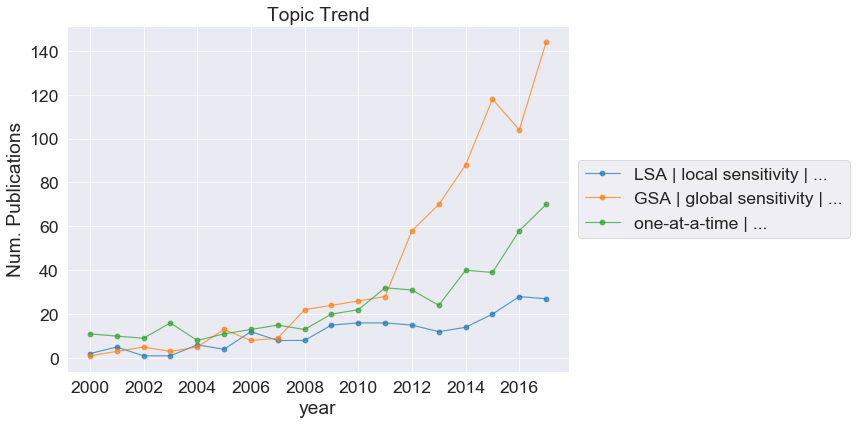

In [30]:
wos_plot.plot_topic_trend([gsa_matches])

In [ ]:
gsa_df.to_csv('../data/gsa_matches.csv')